In [2]:
import numpy as np

In [3]:
def generateKoordinatCity(numOfCity):
    temp = np.zeros([numOfCity,2],dtype=int)
    count = 0
    while count < numOfCity :
        x,y = np.random.randint(20),np.random.randint(20)
        if [x,y] not in temp :
            temp[count]=[x,y]
            count+=1
    return temp
    
print(generateKoordinatCity(6))

[[18 18]
 [17 15]
 [16 13]
 [ 5 10]
 [ 1  9]
 [13 12]]


In [4]:
def generateIndividu(numOfCity):
    ind = np.zeros(numOfCity,dtype=int)-1
    count = 0
    while count < numOfCity:
        temp = np.random.randint(numOfCity)
        if temp not in ind :
            ind[count] = temp
            count += 1
    return ind 

print(generateIndividu(6))

[5 3 0 2 4 1]


In [5]:
def generatePopulation(individu,numOfCity):
    population = np.zeros([individu,numOfCity],dtype=int)
    for i in range(individu):
        population[i] =  generateIndividu(numOfCity)
    location = generateKoordinatCity(numOfCity)
    return population,location

population,location = generatePopulation(6,8)
print("Populasi = \n",population)
print("Koordinat Kota = \n",location)

Populasi = 
 [[3 2 5 4 0 6 1 7]
 [3 0 6 2 1 4 7 5]
 [3 7 2 5 6 0 4 1]
 [5 4 0 3 6 1 7 2]
 [2 1 7 4 0 5 6 3]
 [0 2 1 5 7 4 3 6]]
Koordinat Kota = 
 [[10  3]
 [19 17]
 [16 16]
 [12  7]
 [13  8]
 [11  9]
 [ 4 14]
 [15 18]]


In [6]:
def calculateFitness(population,coordinat):
    (numOfIndividu,numOfCity) = population.shape
    fitness = np.zeros(numOfIndividu)
    for i in range(numOfIndividu):
        jarak=0.0
        for j in range(numOfCity-1):
            jarak += np.sqrt(sum((coordinat[population[i,j]]-coordinat[population[i,j+1]])**2))
        fitness[i] = 1/jarak
    return fitness

# population = np.array([[1,4,0,3,2],[2,1,3,4,0],[1,3,2,4,0],[0,4,1,2,3]])
# location = np.array([[2,3],[4,7],[9,0],[10,8],[16,5]])
print("Populasi = \n",population)
print("Koordinat Kota = \n",location)
fitness = calculateFitness(population,location)
print(fitness)

Populasi = 
 [[3 2 5 4 0 6 1 7]
 [3 0 6 2 1 4 7 5]
 [3 7 2 5 6 0 4 1]
 [5 4 0 3 6 1 7 2]
 [2 1 7 4 0 5 6 3]
 [0 2 1 5 7 4 3 6]]
Koordinat Kota = 
 [[10  3]
 [19 17]
 [16 16]
 [12  7]
 [13  8]
 [11  9]
 [ 4 14]
 [15 18]]
[0.01710328 0.01582442 0.0166611  0.02230871 0.0205636  0.01642439]


In [7]:
def selection(fitness):
    
    totalFitness = np.sum(fitness)
    
    probIndividu = fitness/totalFitness
    sizeIndividu= len(fitness)
    
    komulatif = np.zeros(sizeIndividu+1)
    for i in range(sizeIndividu):
        komulatif[i+1] = komulatif[i]+probIndividu[i]
    
    count=0
    newProb = np.zeros(sizeIndividu,dtype=int)
    for j in range(sizeIndividu):
        roulette = np.random.rand(1)
        for i in range(sizeIndividu+1):
            if roulette>komulatif[i] and roulette <= komulatif[i+1]:
                newProb[count]=i
        count+=1
    return newProb


idx = selection(fitness)

print(idx)

[5 3 1 1 0 3]


In [8]:
def newPopulation(idx,population):
    newP = np.zeros_like(population)
    for i in range(len(idx)):
        newP[i] = population[idx[i]]
    return newP
newPop = newPopulation(idx,population)
print(population)
print("New Populasi dari hasil seleksi:\n",newPop)

[[3 2 5 4 0 6 1 7]
 [3 0 6 2 1 4 7 5]
 [3 7 2 5 6 0 4 1]
 [5 4 0 3 6 1 7 2]
 [2 1 7 4 0 5 6 3]
 [0 2 1 5 7 4 3 6]]
New Populasi dari hasil seleksi:
 [[0 2 1 5 7 4 3 6]
 [5 4 0 3 6 1 7 2]
 [3 0 6 2 1 4 7 5]
 [3 0 6 2 1 4 7 5]
 [3 2 5 4 0 6 1 7]
 [5 4 0 3 6 1 7 2]]


In [9]:
def crossover(population):
    newP = population.copy()
    (numOfIndividu,numOfCity) = population.shape
    for i in range(numOfIndividu):
        ind1,ind2 = np.random.randint(numOfCity),np.random.randint(numOfCity)
        if ind1 <= ind2 :
            temp = ind2 
            for j in range(ind1,ind2+1):
                newP[i,j] = population[i,temp]
                temp-=1
        else:
            temp = ind1
            for j in range(ind2,ind1+1):
                newP[i,j] = population[i,temp]
                temp-=1
    return newP
 
print(newPop)
populasi = crossover(newPop)
print("Hasil Crossover :\n",populasi)

[[0 2 1 5 7 4 3 6]
 [5 4 0 3 6 1 7 2]
 [3 0 6 2 1 4 7 5]
 [3 0 6 2 1 4 7 5]
 [3 2 5 4 0 6 1 7]
 [5 4 0 3 6 1 7 2]]
Hasil Crossover :
 [[0 2 4 7 5 1 3 6]
 [3 0 4 5 6 1 7 2]
 [3 0 6 5 7 4 1 2]
 [6 0 3 2 1 4 7 5]
 [5 2 3 4 0 6 1 7]
 [5 4 0 3 6 1 7 2]]


In [10]:
def mutation(population):
    newP = population.copy()
    (numOfIndividu,numOfCity) = population.shape
    for i in range(numOfIndividu):
        ind1,ind2 = np.random.randint(numOfCity),np.random.randint(numOfCity)
        newP[i,ind1],newP[i,ind2] = newP[i,ind2],newP[i,ind1]
    return newP
print(populasi)
mutasi = mutation(populasi)
print("Hasil Mutasi : \n",mutasi)

[[0 2 4 7 5 1 3 6]
 [3 0 4 5 6 1 7 2]
 [3 0 6 5 7 4 1 2]
 [6 0 3 2 1 4 7 5]
 [5 2 3 4 0 6 1 7]
 [5 4 0 3 6 1 7 2]]
Hasil Mutasi : 
 [[0 2 7 4 5 1 3 6]
 [5 0 4 3 6 1 7 2]
 [3 4 6 5 7 0 1 2]
 [6 0 3 2 1 4 7 5]
 [5 2 3 0 4 6 1 7]
 [5 4 0 6 3 1 7 2]]


In [13]:
def geneticAlgoritm(numOfPopulation,numOfCity,generation):
    (population,location) = generatePopulation(numOfPopulation,numOfCity)
    print("Inisialisasi Populasi :\n",populasi)
    for i in range(generation):
        print(f"Generasi-{i}")
        nilaiFitness = calculateFitness(population,location)
        newInd = selection(nilaiFitness)
        print("Indeks hasil populasi seleksi :",newInd)
        population = newPopulation(newInd,population)
        print("Individu Hasil Seleksi :\n",population)
        population = crossover(population)
        print("Hasil crossover :\n",population)
        population = mutation(population)
        print("Hasil mutasi :\n",population)
    return population
    
geneticAlgoritm(6,8,2)

Inisialisasi Populasi :
 [[0 2 4 7 5 1 3 6]
 [3 0 4 5 6 1 7 2]
 [3 0 6 5 7 4 1 2]
 [6 0 3 2 1 4 7 5]
 [5 2 3 4 0 6 1 7]
 [5 4 0 3 6 1 7 2]]
Generasi-0
Indeks hasil populasi seleksi : [3 2 0 5 4 0]
Individu Hasil Seleksi :
 [[4 0 3 1 2 7 5 6]
 [5 6 2 7 4 3 1 0]
 [0 3 6 1 2 7 4 5]
 [4 0 2 3 7 1 6 5]
 [0 7 5 4 6 2 1 3]
 [0 3 6 1 2 7 4 5]]
Hasil crossover :
 [[4 6 5 7 2 1 3 0]
 [5 6 2 7 4 3 1 0]
 [0 3 4 7 2 1 6 5]
 [4 0 2 3 6 1 7 5]
 [0 7 3 1 2 6 4 5]
 [0 3 6 7 2 1 4 5]]
Hasil mutasi :
 [[6 4 5 7 2 1 3 0]
 [5 2 6 7 4 3 1 0]
 [0 3 1 7 2 4 6 5]
 [4 0 5 3 6 1 7 2]
 [0 7 3 5 2 6 4 1]
 [0 3 6 7 2 1 4 5]]
Generasi-1
Indeks hasil populasi seleksi : [2 0 1 5 0 5]
Individu Hasil Seleksi :
 [[0 3 1 7 2 4 6 5]
 [6 4 5 7 2 1 3 0]
 [5 2 6 7 4 3 1 0]
 [0 3 6 7 2 1 4 5]
 [6 4 5 7 2 1 3 0]
 [0 3 6 7 2 1 4 5]]
Hasil crossover :
 [[0 3 1 7 2 4 6 5]
 [6 4 2 7 5 1 3 0]
 [5 2 6 1 3 4 7 0]
 [0 3 7 6 2 1 4 5]
 [6 4 3 1 2 7 5 0]
 [6 3 0 7 2 1 4 5]]
Hasil mutasi :
 [[0 7 1 3 2 4 6 5]
 [6 4 2 7 3 1 5 0]
 [5 0 6 1 3

array([[0, 7, 1, 3, 2, 4, 6, 5],
       [6, 4, 2, 7, 3, 1, 5, 0],
       [5, 0, 6, 1, 3, 4, 7, 2],
       [6, 3, 7, 0, 2, 1, 4, 5],
       [6, 2, 3, 1, 4, 7, 5, 0],
       [6, 3, 0, 7, 2, 1, 4, 5]])

Inisialisasi Populasi :
 [[4 1 5 2 0 7 6 3]
 [6 1 3 7 0 2 4 5]
 [4 6 5 3 7 0 2 1]
 [5 0 6 4 7 3 2 1]
 [7 2 4 3 5 1 6 0]
 [7 0 4 2 1 3 5 6]]
Generasi-0
Indeks hasil populasi seleksi : [2 3 3 3 0 3]
Individu Hasil Seleksi :
 [[4 6 5 3 7 0 2 1]
 [5 0 6 4 7 3 2 1]
 [5 0 6 4 7 3 2 1]
 [5 0 6 4 7 3 2 1]
 [4 1 5 2 0 7 6 3]
 [5 0 6 4 7 3 2 1]]
Hasil crossover :
 [[4 6 5 0 7 3 2 1]
 [3 7 4 6 0 5 2 1]
 [5 0 6 4 3 7 2 1]
 [5 0 6 2 3 7 4 1]
 [4 1 0 2 5 7 6 3]
 [5 0 6 4 7 3 2 1]]
Hasil mutasi :
 [[4 6 5 2 7 3 0 1]
 [7 3 4 6 0 5 2 1]
 [4 0 6 5 3 7 2 1]
 [5 0 6 2 7 3 4 1]
 [4 1 6 2 5 7 0 3]
 [5 0 4 6 7 3 2 1]]
Generasi-1
Indeks hasil populasi seleksi : [1 3 0 5 1 3]
Individu Hasil Seleksi :
 [[7 3 4 6 0 5 2 1]
 [5 0 6 2 7 3 4 1]
 [4 6 5 2 7 3 0 1]
 [5 0 4 6 7 3 2 1]
 [7 3 4 6 0 5 2 1]
 [5 0 6 2 7 3 4 1]]
Hasil crossover :
 [[7 0 6 4 3 5 2 1]
 [5 0 6 1 4 3 7 2]
 [3 7 2 5 6 4 0 1]
 [2 3 7 6 4 0 5 1]
 [7 3 6 4 0 5 2 1]
 [5 0 1 4 3 7 2 6]]
Hasil mutasi :
 [[7 0 6 4 5 3 2 1]
 [3 0 6 1 4 5 7 2]
 [3 7 2 1 6

array([[7, 0, 6, 4, 5, 3, 2, 1],
       [3, 0, 6, 1, 4, 5, 7, 2],
       [3, 7, 2, 1, 6, 4, 0, 5],
       [3, 2, 7, 6, 4, 0, 5, 1],
       [2, 3, 6, 4, 0, 5, 7, 1],
       [5, 1, 0, 4, 3, 7, 2, 6]])

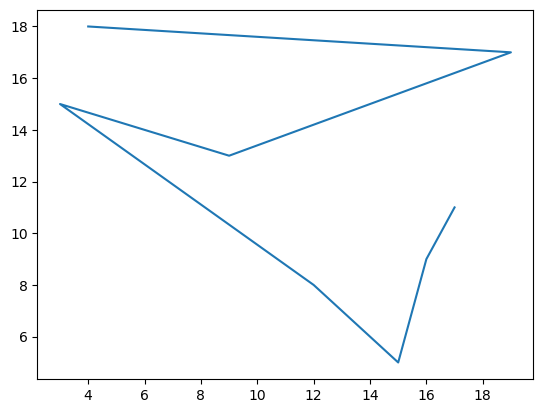

In [60]:
import matplotlib.pyplot as plt
def geneticAlgoritm(numOfPopulation, numOfCity, generation):
    (population, location) = generatePopulation(numOfPopulation, numOfCity)
    print("Inisialisasi Populasi :\n", population)
    
    bestPopulation = 0
    bestFitness = 0
    
    for i in range(generation):
        print(f"Generasi-{i}")
        nilaiFitness = calculateFitness(population, location)
        newInd = selection(nilaiFitness)
        print("Indeks hasil populasi seleksi :", newInd)
        population = newPopulation(newInd, population)
        print("Individu Hasil Seleksi :\n", population)
        population = crossover(population)
        print("Hasil crossover :\n", population)
        population = mutation(population)
        print("Hasil mutasi :\n", population)
        
        
        bestIndex = nilaiFitness.argmax()
        if nilaiFitness[bestIndex] > bestFitness:
            bestPopulation = population[bestIndex]
            bestFitness = nilaiFitness[bestIndex]
        
        disp = []
        for i in range(len(bestPopulation)) :
            disp.append(location[bestPopulation[i]])
       
        
        
    
    print("\nPopulasi terbaik:")
    print(bestPopulation)
    print("Fitness:", bestFitness)
    print("--------",disp)
    x_points = []
    y_points = []
    for i in disp:
        x_points.append(i[0])
        y_points.append(i[1])
    plt.plot(x_points,y_points)
    return population

geneticAlgoritm(6, 8, 2)

In [12]:
def GAwithElitist(numOfPopulation,numOfCity,generation):
    (population,location) = generatePopulation(numOfPopulation,numOfCity)

    print("Inisialisasi Populasi :\n",population)
    for i in range(generation):
        print(f"Generasi-{i}")
        # algoritma genetik
        oldPopulation = population.copy()
        nilaiFitness = calculateFitness(population,location)
        maxFitness = np.max(nilaiFitness)
        newInd = selection(nilaiFitness)
        population = newPopulation(newInd,population)
        population = crossover(population)
        population = mutation(population)
        
        #elitist strategy
        nilaiFitnessOld = calculateFitness(oldPopulation,location)
        indOld = np.argsort(-nilaiFitnessOld)
        nilaiFitnessNew = calculateFitness(population,location)
        indNew = np.argsort(-nilaiFitnessNew)
        
        print("Populasi lama = \n",oldPopulation)
        print("Fitness lama = \n",nilaiFitnessOld)
        print("Populasi baru = \n",population)
        print("Fitness baru = \n",nilaiFitnessNew)
        
        populationOld = newPopulation(indOld[0:numOfPopulation//2],oldPopulation)
        populationNew = newPopulation(indNew[0:numOfPopulation//2],population)
        
        population[0:numOfPopulation//2] = populationOld[0:numOfPopulation//2]
        population[numOfPopulation//2:numOfPopulation] = populationNew[0:numOfPopulation//2]
        
        print("Elitist = \n",population)
        
GAwithElitist(6,8,2)

Inisialisasi Populasi :
 [[4 1 5 3 0 2 7 6]
 [3 4 5 1 7 6 0 2]
 [1 0 6 7 3 2 4 5]
 [0 3 2 6 7 1 5 4]
 [6 1 4 0 7 5 2 3]
 [0 2 5 7 3 6 4 1]]
Generasi-0
Populasi lama = 
 [[4 1 5 3 0 2 7 6]
 [3 4 5 1 7 6 0 2]
 [1 0 6 7 3 2 4 5]
 [0 3 2 6 7 1 5 4]
 [6 1 4 0 7 5 2 3]
 [0 2 5 7 3 6 4 1]]
Fitness lama = 
 [0.01573062 0.01791659 0.0162477  0.01937028 0.01481139 0.01522285]
Populasi baru = 
 [[1 3 6 2 7 0 5 4]
 [0 4 5 1 3 6 2 7]
 [6 1 5 3 0 4 7 2]
 [0 5 7 6 2 1 3 4]
 [1 3 5 6 0 2 4 7]
 [2 1 5 3 0 4 6 7]]
Fitness baru = 
 [0.01851435 0.0214934  0.01740378 0.01845293 0.01647822 0.01688675]
Elitist = 
 [[0 3 2 6 7 1 5 4]
 [3 4 5 1 7 6 0 2]
 [1 0 6 7 3 2 4 5]
 [0 4 5 1 3 6 2 7]
 [1 3 6 2 7 0 5 4]
 [0 5 7 6 2 1 3 4]]
Generasi-1
Populasi lama = 
 [[0 3 2 6 7 1 5 4]
 [3 4 5 1 7 6 0 2]
 [1 0 6 7 3 2 4 5]
 [0 4 5 1 3 6 2 7]
 [1 3 6 2 7 0 5 4]
 [0 5 7 6 2 1 3 4]]
Fitness lama = 
 [0.01937028 0.01791659 0.0162477  0.0214934  0.01851435 0.01845293]
Populasi baru = 
 [[0 4 6 1 7 2 5 3]
 [4 7 2 6 3 1 5 0]
 